## 1) Apply PCA to the images from folder '360 Rocks'. How many components do you need to preserve 90% of the variance?

In [6]:
import os
import numpy as np
from sklearn.decomposition import PCA
from skimage import io, color, img_as_float
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

images_folder_path = '/Users/amitsai/Desktop/MASTERS SEM2/AML/Homework/Homework3/Question1/360 Rocks'


image_list = []
for image in os.listdir(images_folder_path):
    single_image = io.imread(os.path.join(images_folder_path, image))
    grayscale_image = color.rgb2gray(img_as_float(single_image))
    image_list.append(grayscale_image.flatten())

#print(image_list)
images = np.array(image_list)

pca = PCA()
pca.fit(images)


explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)


n_components = np.argmax(explained_variance_ratio_cumulative >= 0.90) + 1

print(f"Number of components needed for 90% variance: {n_components}")

Number of components needed for 90% variance: 158


We need 158 components to preserve 90% of the variance

## 2) Plot 10 images of your choice in the original form (without PCA) and then plot their reconstruction (projection in the original space) after you kept 90% of variance using PCA. 

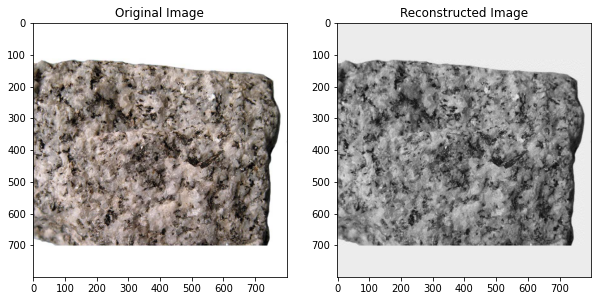

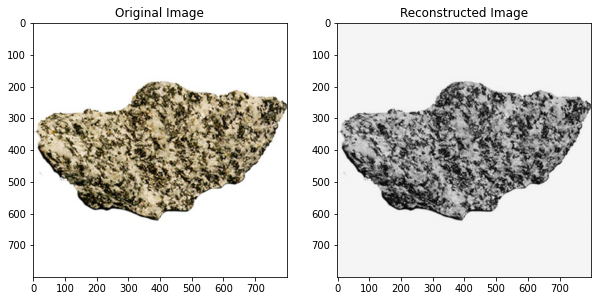

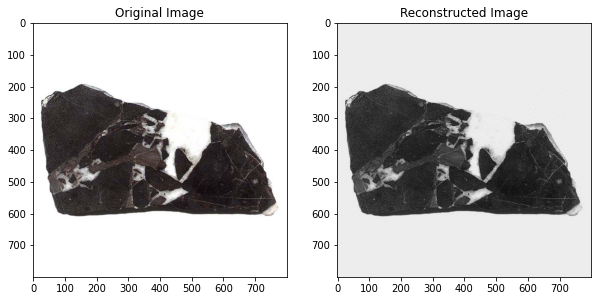

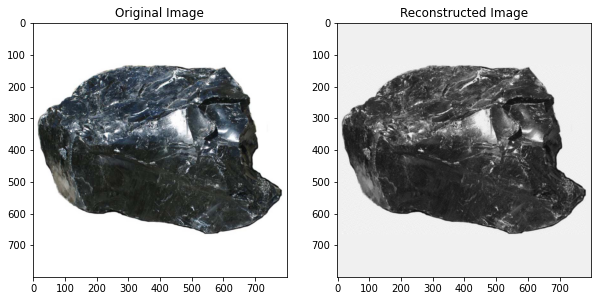

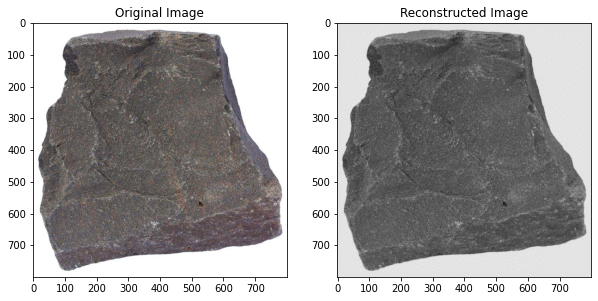

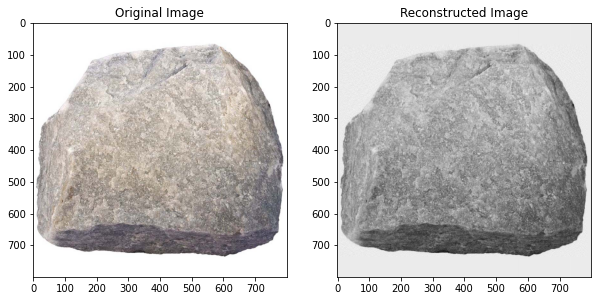

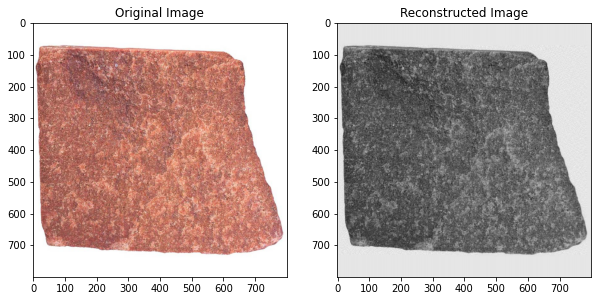

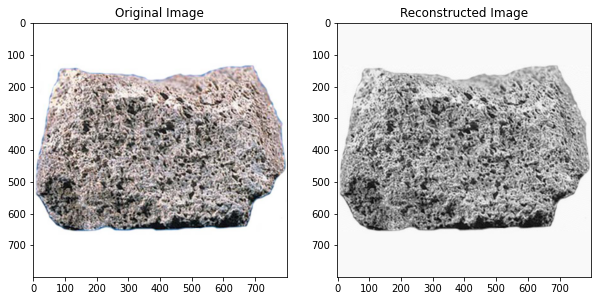

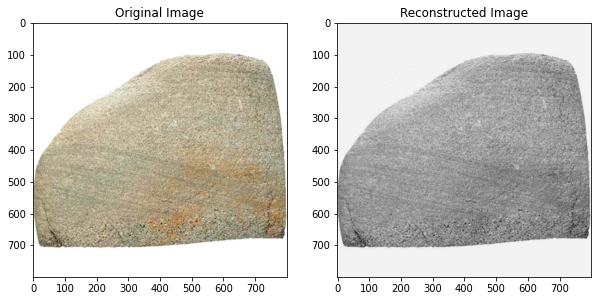

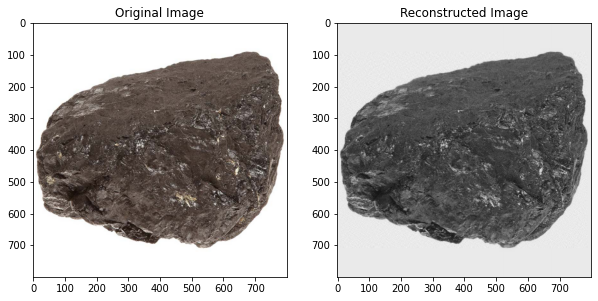

In [165]:
import numpy as np
import cv2
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the image
images_folder_path = '/Users/amitsai/Desktop/MASTERS SEM2/AML/Homework/Homework3/Question1/360 Rocks'
i=0
for image in os.listdir(images_folder_path):
    single_image = io.imread(os.path.join(images_folder_path, image))
    if(i==10):
        break
    else:
        i+=1

# Convert the image to grayscale if it's a color image
        if len(single_image.shape) == 3:
            image_gray = cv2.cvtColor(single_image, cv2.COLOR_BGR2GRAY)
        else:
            image_gray = single_image

        # Perform PCA on the flattened image array
        pca = PCA(n_components=158)  # Preserve 90% of the variance


        pca.fit(image_gray)

        # Transform the image onto the new feature space
        image_transformed = pca.transform(image_gray)

        # Reconstruct the image using the transformed data
        image_reconstructed = pca.inverse_transform(image_transformed)

        # Plot original and reconstructed images
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(single_image)
        plt.title('Original Image')

        plt.subplot(1, 2, 2)
        plt.imshow(image_reconstructed, cmap='gray')
        plt.title('Reconstructed Image')

        plt.show()

In [167]:
image_reconstructed.shape
image_transformed.shape

(800, 158)

# 3) Each of the images belongs to one of three rock categories. The category is indicated by the first letter in the filename (I, M and S). We will now try to see if the visualization can help us identify different clusters.

## A) Use PCA to reduce dimensionality to only 2 dimensions. How much of the variance is explained with the first two principal components

In [16]:
images_folder_path = '/Users/amitsai/Desktop/MASTERS SEM2/AML/Homework/Homework3/Question1/360 Rocks'
list_of_images = []
labels=[]
for image in os.listdir(images_folder_path):
    single_image = io.imread(os.path.join(images_folder_path, image))
    image_gray = color.rgb2gray(img_as_float(single_image))
    list_of_images.append(image_gray.flatten())
    labels.append(image[0])

array_of_images=np.array(list_of_images)

pca=PCA(n_components=2)
pca_of_images=pca.fit_transform(array_of_images)

explained_variance_ratio = pca.explained_variance_ratio_

print(f"Variance explained by the first two components: {explained_variance_ratio.sum() * 100:.2f}%")
    
    

Variance explained by the first two components: 33.15%


In [22]:
print(image[0])

I


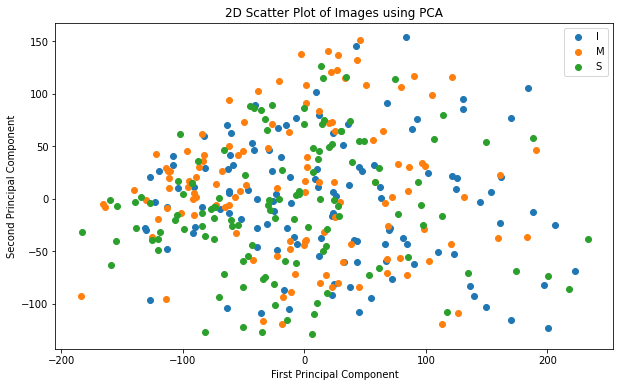

In [23]:
import os
import numpy as np
from skimage import io, color, img_as_float
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the folder containing the images
images_folder_path = '/Users/amitsai/Desktop/MASTERS SEM2/AML/Homework/Homework3/Question1/360 Rocks'

# Load the images and labels
list_of_images = []
labels = []
for image_name in os.listdir(images_folder_path):
    single_image = io.imread(os.path.join(images_folder_path, image_name))
    image_gray = color.rgb2gray(img_as_float(single_image))
    list_of_images.append(image_gray.flatten())
    labels.append(image_name[0])  # Assuming the first character of the filename represents the image category

# Convert the list of images to a numpy array
array_of_images = np.array(list_of_images)

# Perform PCA
pca = PCA(n_components=2)
pca_of_images = pca.fit_transform(array_of_images)

# Create a scatter plot of the first two principal components
plt.figure(figsize=(10, 6))
for label in np.unique(labels):
    indices = np.where(np.array(labels) == label)
    plt.scatter(pca_of_images[indices, 0], pca_of_images[indices, 1], label=label)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('2D Scatter Plot of Images using PCA')
plt.legend()
plt.show()


In [29]:
print(pca_of_images[0,1])

-38.792322913764025


In [28]:
print(pca_of_images)

[[ 4.12610605e+01 -3.87923229e+01]
 [-1.07827293e+02  3.22118928e+01]
 [-3.19417645e+01  7.62564679e+01]
 [ 6.81474329e+01  9.14682835e+01]
 [ 1.36697558e+02 -8.29722388e+01]
 [-3.42129173e+01 -1.15841517e+02]
 [ 4.49240093e+01 -8.39435799e+01]
 [-3.85966791e+01 -1.78888974e-01]
 [-6.60815108e+01 -7.15062454e+01]
 [ 1.06930312e+02  5.72384966e+01]
 [-6.28309445e+01  2.80514390e+01]
 [-1.19943579e-01  8.65708928e+01]
 [ 1.47690741e+01  7.06741351e+01]
 [ 9.59906357e+01 -5.79573637e+00]
 [-4.60409130e+01  7.93936032e+00]
 [ 1.88371742e+02  5.76814821e+01]
 [ 2.30234943e+01 -9.14225894e+01]
 [-1.18751710e+02 -3.16773781e+01]
 [-1.30701273e+02 -2.76436194e+01]
 [ 1.24423081e+01 -5.42327892e+01]
 [ 2.27383636e+01 -8.41551011e+01]
 [ 2.52337315e+01 -1.68906658e+01]
 [ 2.06617579e+02 -2.50658270e+01]
 [-2.84119739e+01 -1.02332343e+01]
 [-8.44201737e+01 -8.30555039e+00]
 [ 8.54615383e+01  7.68665398e+00]
 [-2.25311732e+01 -4.85232674e+01]
 [-2.31939233e+01  4.17682710e+00]
 [ 6.98602523e+01 -2

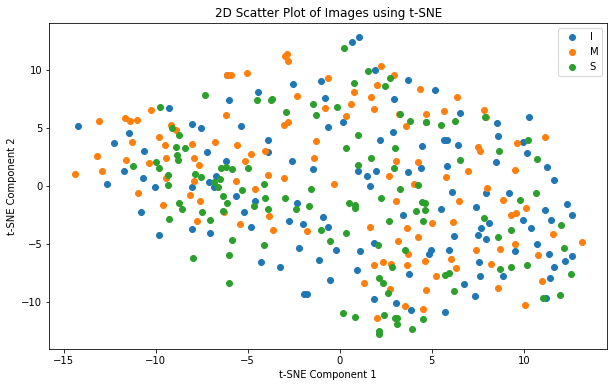

In [61]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Define the t-SNE model
tsne = TSNE(n_components=2, init="random", learning_rate="auto", random_state=50)

# Fit and transform the image data using t-SNE
X_reduced = tsne.fit_transform(array_of_images)

# Create a scatter plot of the t-SNE embedding
plt.figure(figsize=(10, 6))
for label in np.unique(labels):
    indices = np.where(np.array(labels) == label)
    plt.scatter(X_reduced[indices, 0], X_reduced[indices, 1], label=label)

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('2D Scatter Plot of Images using t-SNE')
plt.legend()
plt.show()


## B) Plot a 2D scatter plot of the images spanned by the first two principal components. Each image will be represented with a dot. Make the color of the dot correspond to the image category (so you will have three different colors). Then add some rock images to the visualization to better understand what features in the images are accounting for the majority of variance in the data 

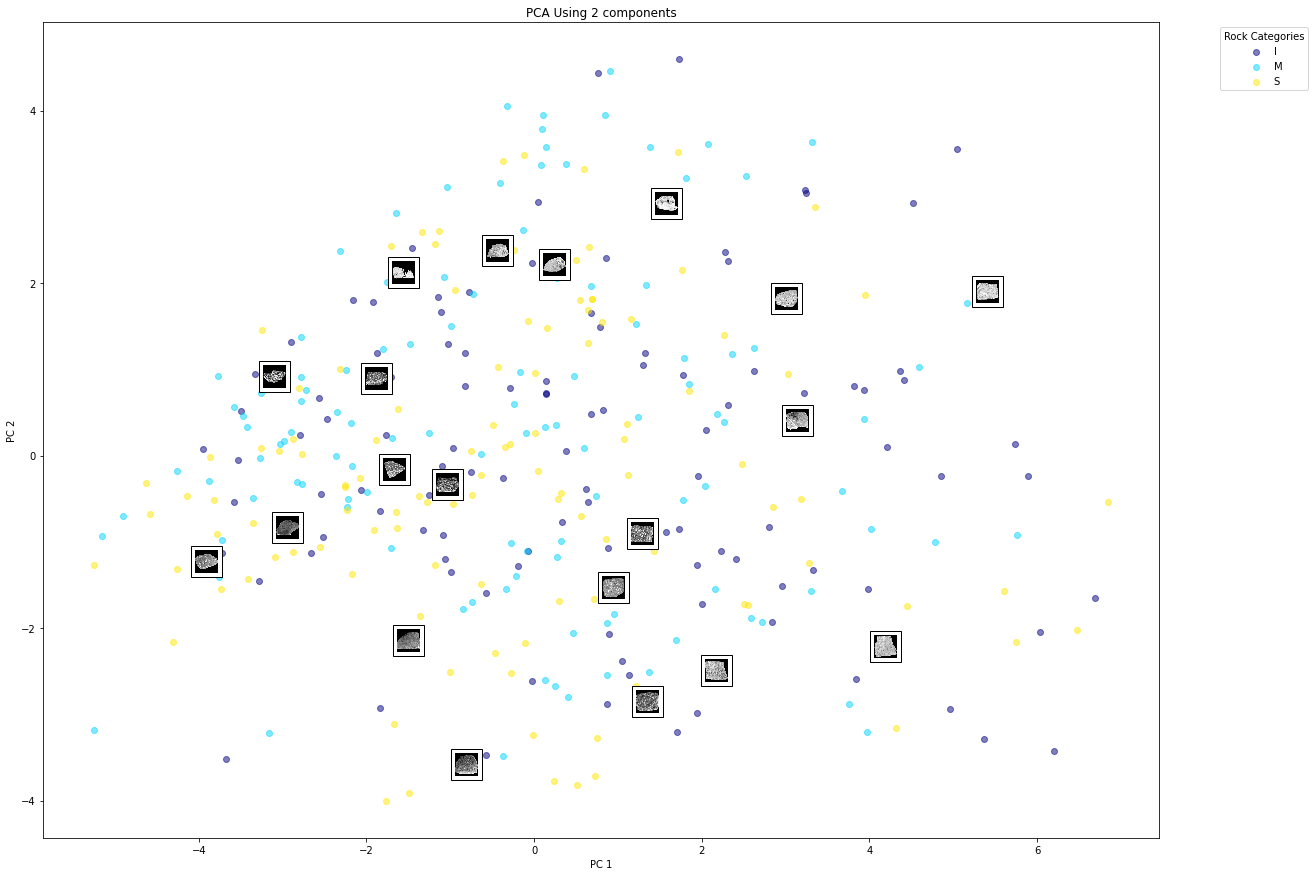

In [63]:
resized_images = []
labels = []

for image_name in os.listdir(images_folder_path):
    image_path = os.path.join(images_folder_path, image_name)
    single_image = io.imread(image_path)  # Read the image using skimage
    img = cv2.resize(single_image, (23, 23))  # Resize the image using cv2
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    resized_images.append(img_gray.flatten())  # Flatten the resized image
    labels.append(image_name[0])  # Extract the label

X = np.array(resized_images)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)

X_normalized = MinMaxScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

def plot_rocks_in2d(X, y, max_images=20, min_distance=0.04, images=None, figsize=(20, 15)):
    plt.figure(figsize=figsize)
    cmap = plt.cm.jet
    rock_categories = np.unique(y)
    ax = plt.gca()

    dict_cat={0:'I',1:'M',2:'S'}
    for category in rock_categories:
        plt.scatter(X[y == category, 0], X[y == category, 1],
                    c=[cmap(float(category) / len(rock_categories))], alpha=0.5, label=str(dict_cat[category]))

    plt.legend(title='Rock Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    

    neighbors = np.array([[10., 10.]])
    displayed_images = 0

    for index, image_coord in enumerate(X):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance and displayed_images < max_images:
            neighbors = np.r_[neighbors, [image_coord]]
            displayed_images += 1
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(y[index]),
                         color=cmap(float(y[index]) / len(rock_categories)),
                         fontdict={"weight": "bold", "size": 16})
            else:
                images_of_rock = images[index].reshape(23, 23)
                imagebox = AnnotationBbox(OffsetImage(images_of_rock, cmap="binary"),
                                          image_coord)
                ax.add_artist(imagebox)


plot_rocks_in2d(X_pca, y_encoded, max_images=20, images=X)

plt.title('PCA Using 2 components')
plt.show()



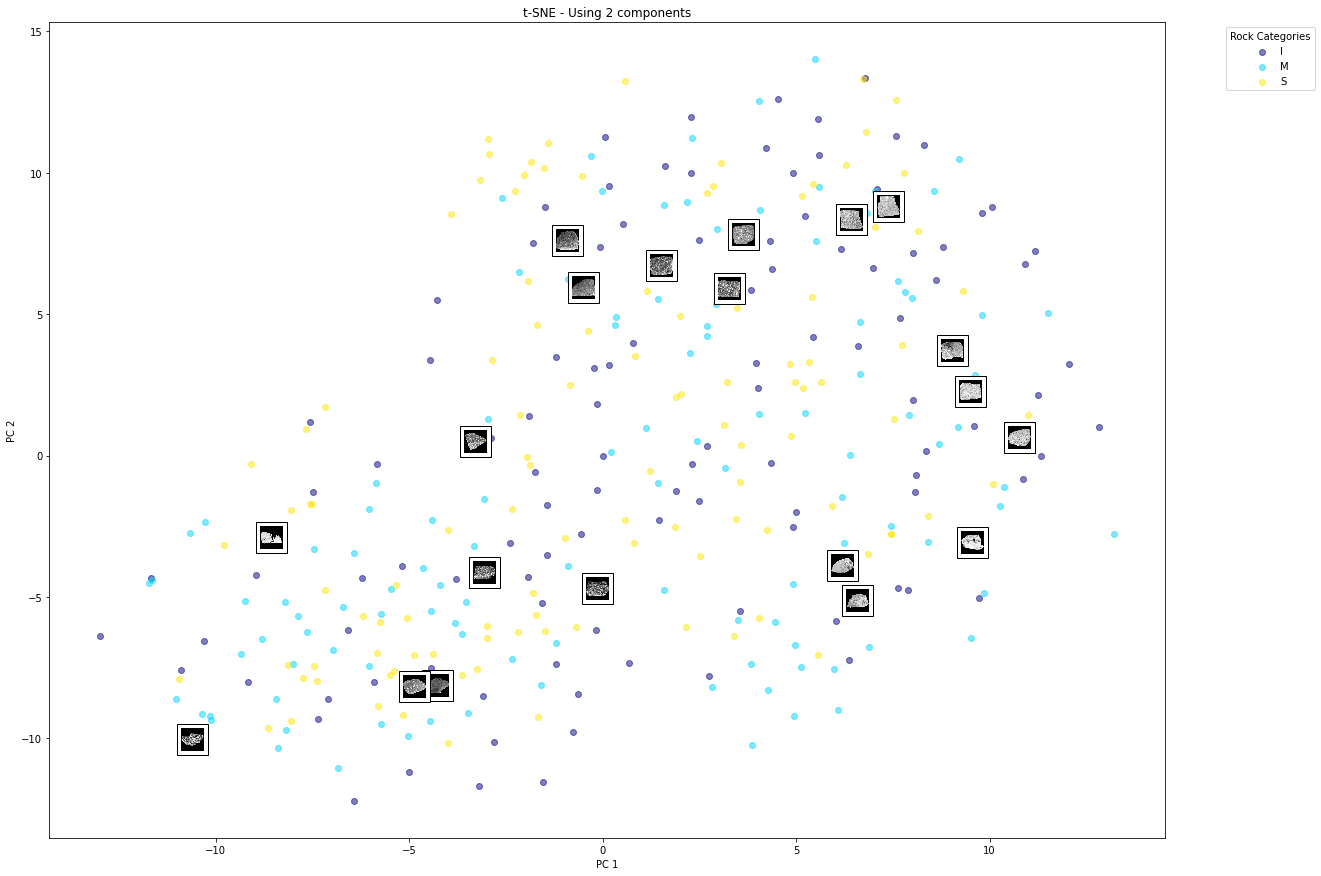

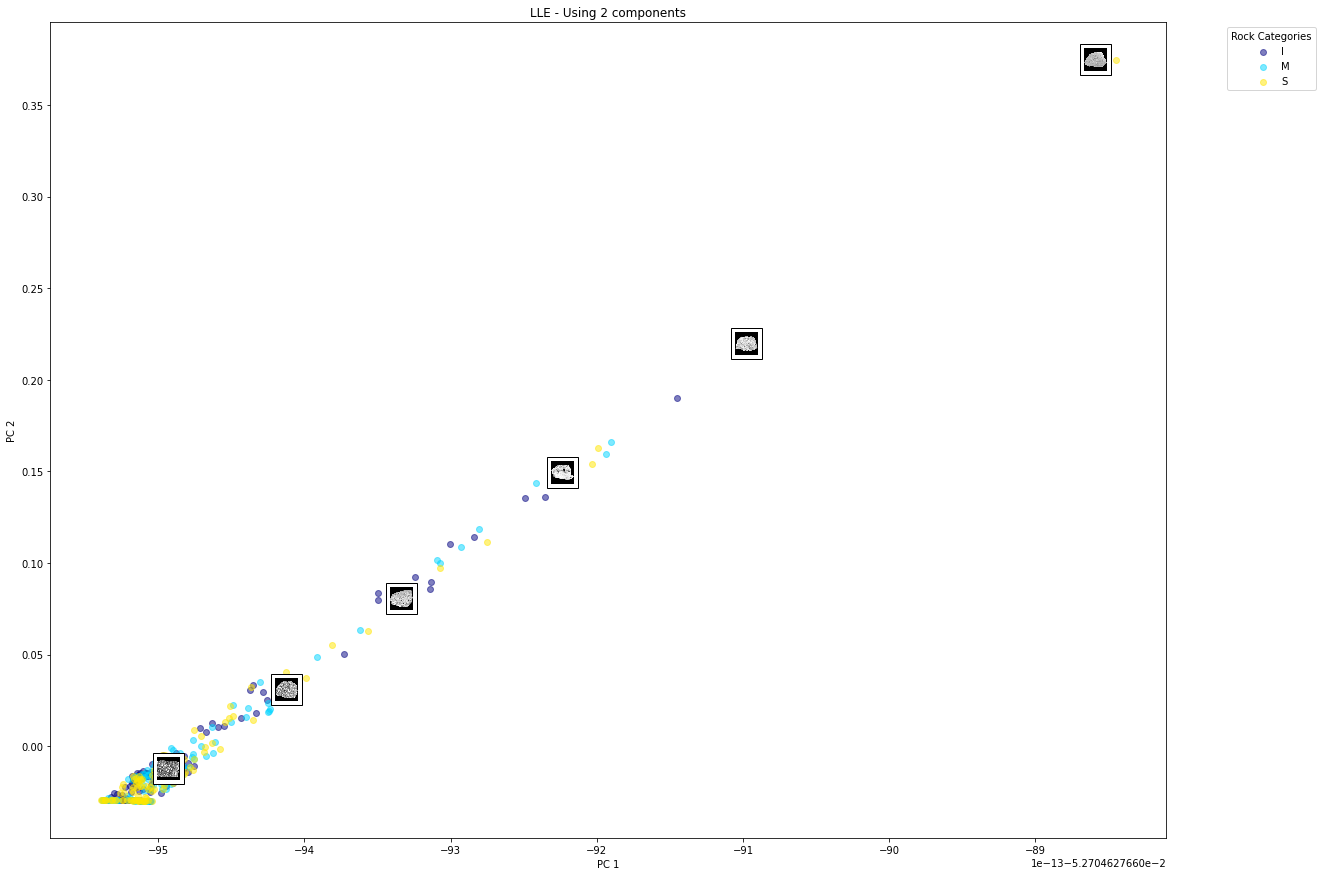

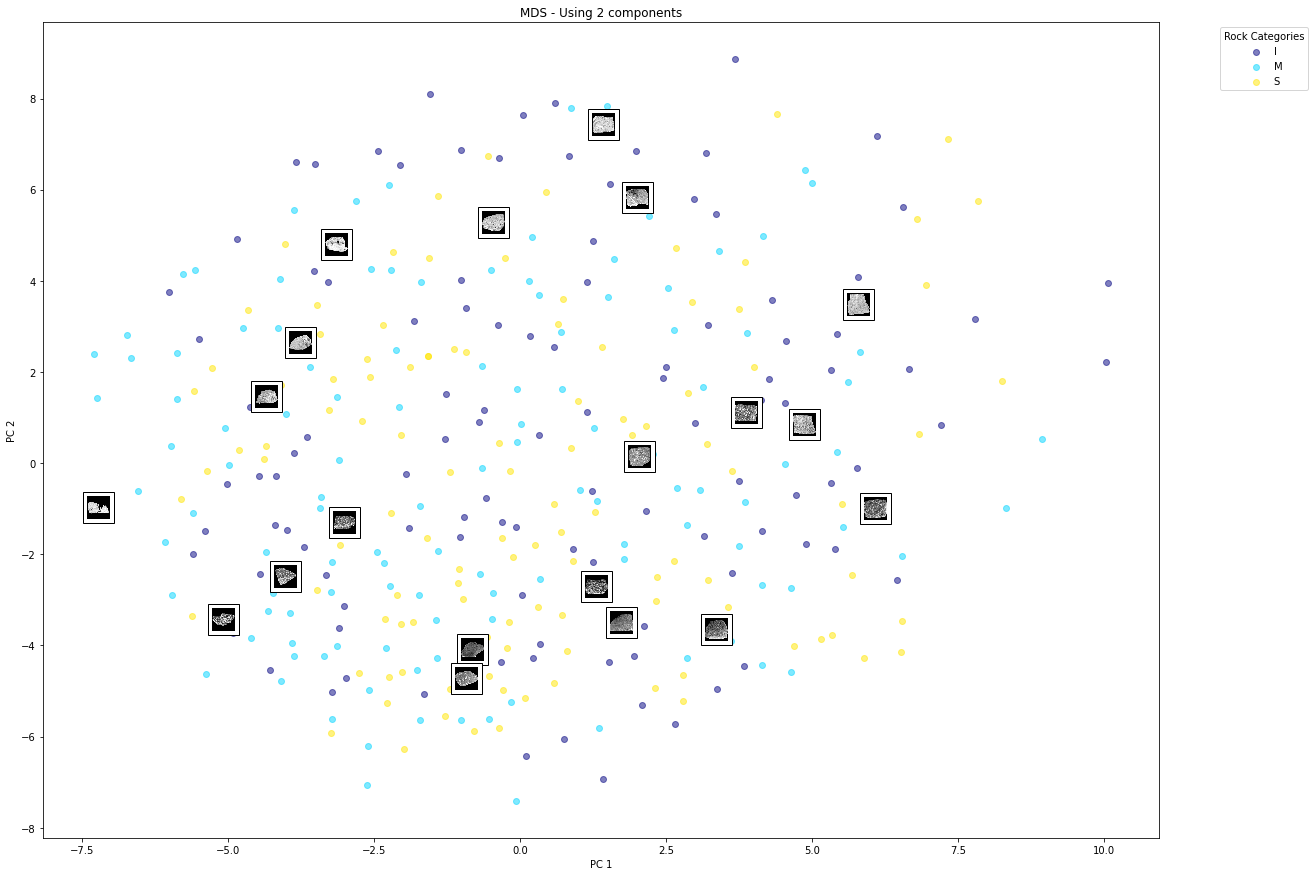

In [65]:
from sklearn.manifold import TSNE, LocallyLinearEmbedding, MDS
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import matplotlib.pyplot as plt

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)

X_normalized = MinMaxScaler().fit_transform(X)

tsne = TSNE(n_components=2, random_state=50)
X_tsne = tsne.fit_transform(X_normalized)

lle = LocallyLinearEmbedding(n_components=2, random_state=50)
X_lle = lle.fit_transform(X_normalized)

mds = MDS(n_components=2, random_state=50)
X_mds = mds.fit_transform(X_normalized)


plot_rocks_in2d(X_tsne, y_encoded, max_images=20, images=X)
plt.title('t-SNE - Using 2 components')
plt.show()

plot_rocks_in2d(X_lle, y_encoded, max_images=20, images=X)
plt.title('LLE - Using 2 components')
plt.show()


plot_rocks_in2d(X_mds, y_encoded, max_images=20, images=X)
plt.title('MDS - Using 2 components')
plt.show()

plt.show()

## c)Discuss your observations.

Despite experimenting with four different visualization techniques, none of them effectively distinguished between the categories within the dataset. Across all four visualizations, discernible clusters were not evident. This lack of clarity suggests that the inherent structure of the data may be intricate and not easily separable using conventional visualization methods

## 4) Run PCA, t-SNE, LLE and MDS to reduce the dimensionality of the images to 8. Then, compare those image embeddings with the ones from humans that are in the mds_360.txt file. Use Procrustes analysis to do the comparison

In [94]:
list_of_images = []
labels=[]
for image in os.listdir(images_folder_path):
    single_image = io.imread(os.path.join(images_folder_path, image))
    image_gray = color.rgb2gray(img_as_float(single_image))
    list_of_images.append(image_gray.flatten())
    labels.append(image[0])

array_of_images=np.array(list_of_images)

array_of_images_normalised = MinMaxScaler().fit_transform(array_of_images)

pca=PCA(n_components=8)
pca_of_images=pca.fit_transform(array_of_images_normalised)

tsne=TSNE(n_components=8,method='exact')
tsne_of_images=tsne.fit_transform(array_of_images_normalised)

lle = LocallyLinearEmbedding(n_components=8)
lle_of_images=lle.fit_transform(array_of_images_normalised)


mds = MDS(n_components=8)
mds_of_images=mds.fit_transform(array_of_images_normalised)




In [87]:
print(pca_of_images.shape)

(360, 8)


In [88]:
import numpy as np

# Path to your text file
file_path = "/Users/amitsai/Desktop/MASTERS SEM2/AML/Homework/Homework3/Question1/mds_360.txt"

# Initialize an empty list to store the data
human_data_list = []

# Read the text file line by line
with open(file_path, "r") as file:
    for line in file:
        # Split each line into individual values (assuming space-separated values)
        values = line.strip().split()
        
        # Convert the values to float and append them to the data list
        human_data_list.append([float(value) for value in values])

# Convert the data list to a NumPy array
human_data_array = np.array(data_list)

# Check the shape of the array
print("Shape of the array:", human_data_array.shape)


Shape of the array: (360, 8)


In [89]:
print(human_data_array)

[[-3.743 -1.204  2.001 ... -1.992  4.95   1.695]
 [ 2.332  1.625  0.985 ...  0.093  6.724  0.708]
 [ 0.346  1.49  -3.795 ... -3.786  0.706 -2.854]
 ...
 [-3.475 -3.431 -2.184 ... -2.265  1.129 -1.201]
 [-0.051 -2.358  1.994 ...  7.268 -0.593 -1.432]
 [ 1.134 -4.9    0.983 ...  4.695  0.624 -1.195]]


In [95]:
from scipy.spatial import procrustes
mtx1_pca, mtx2_pca, disparity_pca = procrustes(human_data_array, pca_of_images )

mtx1_tsne, mtx2_tsne, disparity_tsne = procrustes(human_data_array, tsne_of_images )

mtx1_lle, mtx2_lle, disparity_lle = procrustes(human_data_array, lle_of_images )

mtx1_mds, mtx2_mds, disparity_mds = procrustes(human_data_array, mds_of_images )


#print(mtx1,mtx2,disparity)

In [91]:
print(mtx1_pca)

[[-0.02752123 -0.00393436  0.01071516 ... -0.01529132  0.02959598
   0.01280227]
 [ 0.01639672  0.0165173   0.0033702  ... -0.00021824  0.04242074
   0.00566696]
 [ 0.00203934  0.01554135 -0.03118582 ... -0.02826067 -0.00108514
  -0.02008377]
 ...
 [-0.02558378 -0.02003399 -0.01953943 ... -0.01726491  0.00197285
  -0.00813376]
 [-0.00083069 -0.01227696  0.01066455 ...  0.05165192 -0.01047599
  -0.00980372]
 [ 0.00773602 -0.03065382  0.00335574 ...  0.03305095 -0.00167794
  -0.00809038]]


In [96]:
print(disparity_pca)

print(disparity_tsne)

print(disparity_lle)

print(disparity_mds)

0.9804966362009445
0.9895667386161463
0.9778605222171601
0.9814094402470546


In [98]:
print(mtx1_pca.shape)

(360, 8)


In [100]:
import pandas as pd
import numpy as np

# Define the dimensions
num_dimensions = mtx1_pca.shape[1]

# Initialize lists to store correlation coefficients for each dimension
correlation_dimensions = [[] for _ in range(num_dimensions)]

# Compute correlation coefficients for each dimension
for i in range(num_dimensions):
    correlation_pca = np.corrcoef(mtx1_pca[:, i], mtx2_pca[:, i])[0, 1]
    correlation_tsne = np.corrcoef(mtx1_tsne[:, i], mtx2_tsne[:, i])[0, 1]
    correlation_lle = np.corrcoef(mtx1_lle[:, i], mtx2_lle[:, i])[0, 1]
    correlation_mds = np.corrcoef(mtx1_mds[:, i], mtx2_mds[:, i])[0, 1]
    
    # Append correlation coefficients to the respective dimension list
    correlation_dimensions[i].extend([correlation_pca, correlation_tsne, correlation_lle, correlation_mds])

# Create a DataFrame to organize the results
results = pd.DataFrame(correlation_dimensions, columns=['PCA', 't-SNE', 'LLE', 'MDS'])

# Add dimension labels to the DataFrame
dimension_labels = [f'Dimension {i+1}' for i in range(num_dimensions)]
results.insert(0, 'Dimension', dimension_labels)

# Display the results
print(results)


     Dimension       PCA     t-SNE       LLE       MDS
0  Dimension 1  0.058458  0.087012  0.150889  0.084949
1  Dimension 2  0.139844  0.107128  0.145299  0.143907
2  Dimension 3  0.131716  0.125867  0.100843  0.126805
3  Dimension 4  0.149536  0.127345  0.139690  0.152568
4  Dimension 5  0.176232  0.126052  0.158944  0.149119
5  Dimension 6  0.211072  0.127307  0.236518  0.208339
6  Dimension 7  0.078050  0.051659  0.107751  0.075617
7  Dimension 8  0.139529  0.065607  0.133043  0.126095


Based on the table:

Dimensionality reduction techniques differ in their ability to capture features similar to human assessments.

PCA and MDS generally exhibit higher correlation coefficients across most dimensions compared to t-SNE and LLE.

Dimensionality reduction techniques, particularly PCA and MDS, tend to capture certain features more effectively than others, as evidenced by variations in correlation coefficients across dimensions.

## 5) Cluster the 360 images using K-Means. You can reduce the dimensionality using PCA if you wish, but keep at least 90% of the variance. Determine the number of clusters

## A) You can reduce the dimensionality using PCA if you wish, but keep at least 90% of the variance. Determine the number of clusters

In [102]:
pca = PCA(n_components=158) # 90% of the variance
kmeans_pca_of_images = pca.fit_transform(array_of_images_normalised)

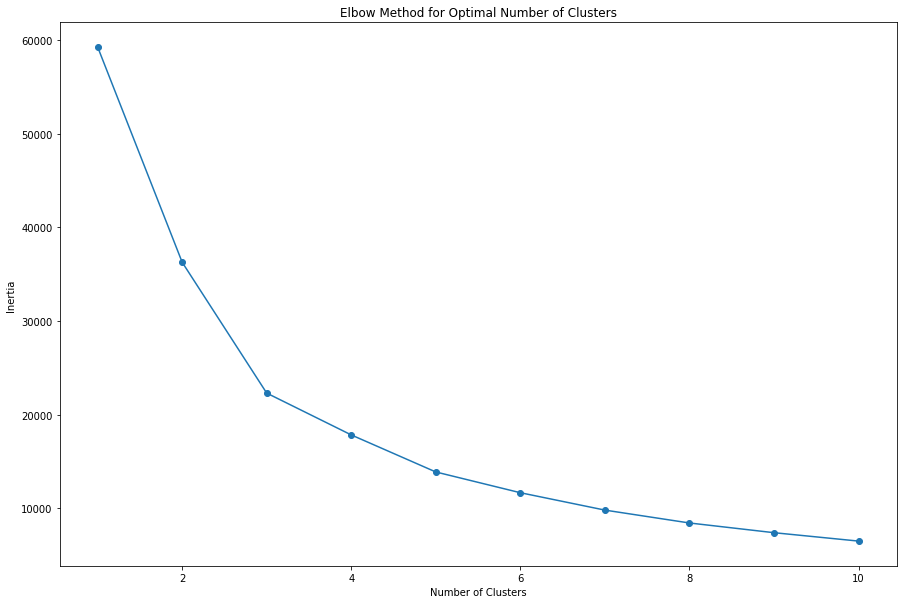

In [271]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap


X_flat = X.reshape(X.shape[0], -1)
X_standardized = StandardScaler().fit_transform(X_flat)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# Determine the optimal number of clusters using the Elbow Method

inertia_values = []
cluster_range = range(1, 11)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=50)
    kmeans.fit(X_pca)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(15, 10))
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia ')
plt.show()

By using elbow method we can tell that k=3 is the optimal number of clusters, even our data has 3 categories

Silhouette Score for k=2: 0.14526361139193247
Silhouette Score for k=3: 0.11890359396727956
Silhouette Score for k=4: 0.0944562380302848
Silhouette Score for k=5: 0.09596457178014511
Silhouette Score for k=6: 0.08006434443995866


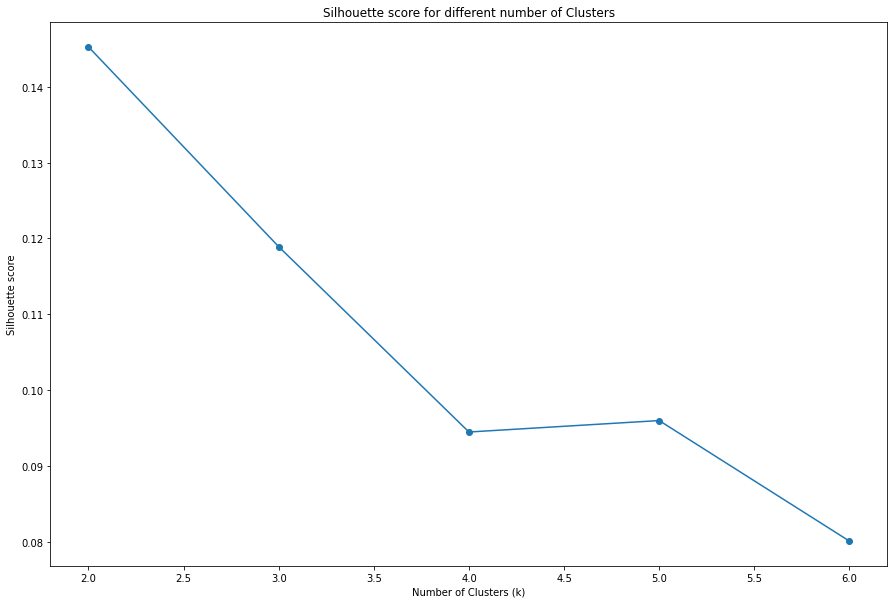

In [272]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define a range of k values to test
k_values = [2, 3, 4, 5, 6]

plot_list=[]

# Iterate over each k value
for k in k_values:
    # Initialize the KMeans model with the current k value
    kmeans = KMeans(n_clusters=k,random_state=50)
    
    # Fit the model to your data
    kmeans.fit(kmeans_pca_of_images)
    
    # Calculate the silhouette score
    silhouette = silhouette_score(kmeans_pca_of_images, kmeans.labels_)
    plot_list.append(silhouette)
    
    # Print the silhouette score for the current k value
    print(f"Silhouette Score for k={k}: {silhouette}")
    

plt.figure(figsize=(15, 10))    
plt.plot(k_values,plot_list,marker='o')

plt.title('Silhouette score for different number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette score')

plt.show()




k=2 has the highest silhoutte value even k=3 has next highest value. But if we see our elbow graph it clearly shows that k=3 is the optimal value for clustering

Utilizing PCA aids in simplifying the clustering process by reducing the dimensions of the original images, thereby facilitating easier image processing by the algorithm. 

Both the Elbow method and Silhouette method allow us to determine the optimal number of clusters in K-means clustering. In our scenario, both techniques converge on the optimal number of clusters being 3. Given that our original dataset comprises 3 categories of rocks, this clustering aligns with our expectations.

## B) Set the number of clusters to 3 and report clustering accuracy.

In [275]:
from sklearn.metrics import accuracy_score

# Assuming X contains your data and y_true contains the true labels

# Fit KMeans clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(kmeans_pca_of_images)

# Predict cluster labels
y_pred = kmeans.labels_

#dict_cat={0:'I',1:'M',2:'S'}
dict_cat={'S':0,'I':1,'M':2}

num=[]

for val in labels:
    num.append(dict_cat[val])
num_array=np.array(num)

accuracy = accuracy_score(num_array, y_pred)
print("K-means Clustering Accuracy:", accuracy)





K-means Clustering Accuracy: 0.3416666666666667


In [120]:
labels

['I',
 'I',
 'S',
 'I',
 'I',
 'M',
 'M',
 'I',
 'S',
 'S',
 'I',
 'S',
 'S',
 'S',
 'I',
 'S',
 'I',
 'S',
 'I',
 'I',
 'M',
 'M',
 'I',
 'S',
 'I',
 'M',
 'I',
 'I',
 'I',
 'M',
 'M',
 'I',
 'I',
 'S',
 'I',
 'I',
 'S',
 'I',
 'S',
 'S',
 'I',
 'S',
 'I',
 'I',
 'M',
 'I',
 'I',
 'I',
 'I',
 'M',
 'M',
 'I',
 'I',
 'I',
 'I',
 'M',
 'I',
 'S',
 'S',
 'S',
 'S',
 'S',
 'M',
 'I',
 'I',
 'I',
 'I',
 'M',
 'I',
 'I',
 'I',
 'I',
 'I',
 'S',
 'I',
 'I',
 'I',
 'S',
 'S',
 'I',
 'S',
 'S',
 'I',
 'M',
 'M',
 'I',
 'S',
 'I',
 'S',
 'M',
 'S',
 'I',
 'S',
 'I',
 'I',
 'I',
 'I',
 'I',
 'S',
 'M',
 'M',
 'I',
 'S',
 'I',
 'I',
 'S',
 'S',
 'M',
 'M',
 'M',
 'M',
 'S',
 'S',
 'I',
 'I',
 'S',
 'M',
 'M',
 'S',
 'S',
 'I',
 'I',
 'I',
 'M',
 'S',
 'S',
 'S',
 'M',
 'S',
 'S',
 'S',
 'I',
 'M',
 'I',
 'I',
 'I',
 'S',
 'S',
 'M',
 'I',
 'I',
 'S',
 'S',
 'M',
 'M',
 'M',
 'M',
 'S',
 'S',
 'I',
 'I',
 'I',
 'M',
 'S',
 'S',
 'S',
 'I',
 'I',
 'I',
 'S',
 'S',
 'S',
 'M',
 'M',
 'M',
 'S',
 'S'

In [122]:
y_pred

array([1, 0, 2, 2, 1, 0, 1, 0, 0, 2, 0, 2, 2, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 1, 2, 2, 0, 2, 1, 1, 1, 1, 0,
       1, 1, 2, 0, 0, 1, 2, 1, 2, 2, 0, 0, 2, 2, 0, 0, 0, 1, 1, 2, 1, 2,
       1, 2, 1, 1, 0, 2, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0,
       1, 0, 2, 0, 2, 2, 1, 0, 1, 1, 2, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 2, 0, 0, 0, 0, 2, 1, 0, 1, 0, 2, 0, 1, 2, 0, 0, 0, 0, 1, 2, 0,
       0, 2, 1, 0, 0, 1, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 1,
       0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 2, 1, 2, 1, 1, 0, 2, 0, 0,
       2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 1, 2, 0, 2, 1, 0, 1, 2, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 2,

# 6)Cluster the 360 images using EM.

## A) You can again reduce the dimensionality using PCA if you wish, but keep at least 90% of the variance. Determine the number of clusters  

Silhouette Score for k=2: 0.14453309695619232
Silhouette Score for k=3: 0.09383279519716155
Silhouette Score for k=4: 0.10102528429357747
Silhouette Score for k=5: 0.09805368933563273
Silhouette Score for k=6: 0.08082488284015081


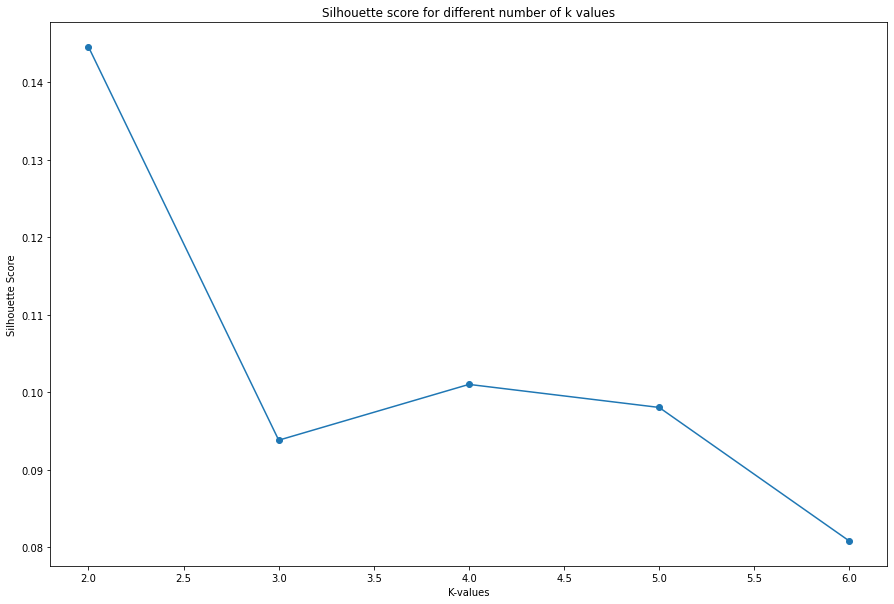

In [273]:

from sklearn.metrics import silhouette_score

# Define a range of k values to test
k_values = [2, 3, 4, 5, 6]

plot_list=[]

# Iterate over each k value
for k in k_values:
    # Initialize the KMeans model with the current k value
    gm = GaussianMixture(n_components=k,random_state=50)
    
    # Fit the model to your data
    gm.fit(em_pca_of_images)
    
    cluster_labels = gm.predict(em_pca_of_images)
    
    # Calculate the silhouette score
    silhouette = silhouette_score(em_pca_of_images, cluster_labels)
    plot_list.append(silhouette)
    
    # Print the silhouette score for the current k value
    print(f"Silhouette Score for k={k}: {silhouette}")
    

plt.figure(figsize=(15, 10))    
plt.plot(k_values,plot_list,marker="o")
plt.title('Silhouette score for different number of k values')
plt.xlabel('K-values')
plt.ylabel('Silhouette Score')

plt.show()


aic value for k=2: 412288.1561625524
bic value for k=2: 511146.7566186129
aic value for k=3: 206720.07115107815
bic value for k=3: 355009.9148871846
aic value for k=4: 76210.84579983767
bic value for k=4: 273931.9328159901
aic value for k=5: 34200.686171907524
bic value for k=5: 281353.016468106
aic value for k=6: -59176.49151807232
bic value for k=6: 237407.08205817215


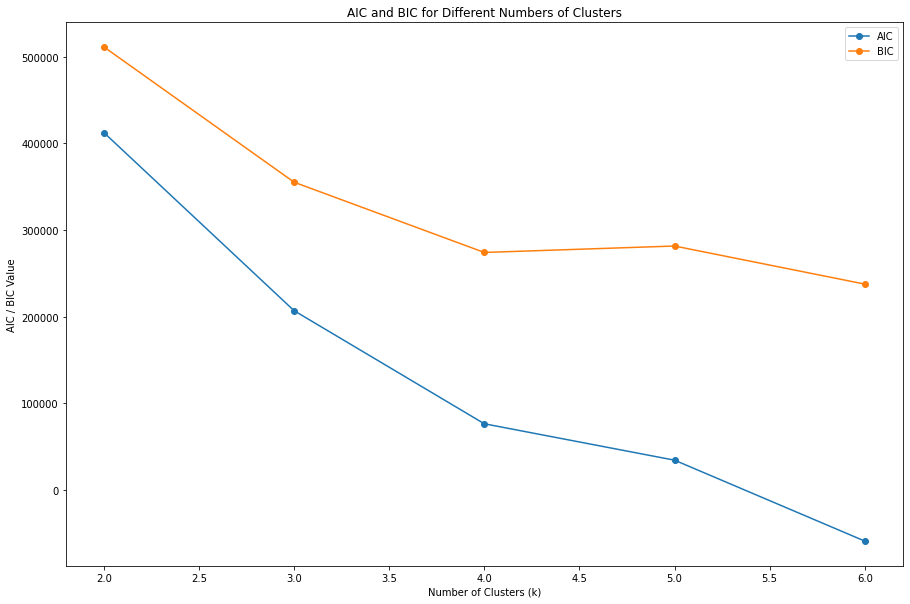

In [274]:

from sklearn.metrics import silhouette_score

# Define a range of k values to test
k_values = [2, 3, 4, 5, 6]

plot_list=[]
aic_l=[]
bic_l=[]

# Iterate over each k value
for k in k_values:
    # Initialize the KMeans model with the current k value
    gm = GaussianMixture(n_components=k,random_state=50)
    
    # Fit the model to your data
    gm.fit(em_pca_of_images)
    
    cluster_labels = gm.predict(em_pca_of_images)
    
    aic_val=gm.aic(em_pca_of_images)
    bic_val=gm.bic(em_pca_of_images)
    
    aic_l.append(aic_val)
    bic_l.append(bic_val)
    
    # Calculate the silhouette score
    
    
    
    # Print the silhouette score for the current k value
    print(f"aic value for k={k}: {aic_val}")
    print(f"bic value for k={k}: {bic_val}")
    
    


plt.figure(figsize=(15, 10))
plt.plot(k_values, aic_l, label='AIC',marker="o")
plt.plot(k_values, bic_l, label='BIC',marker="o")
plt.xlabel('Number of Clusters (k)')
plt.ylabel('AIC / BIC Value')
plt.title('AIC and BIC for Different Numbers of Clusters')
plt.legend()
plt.show()


Silhouette Score for EM is highest for 2 clusters, 4 clusters is the next highest. But in our dataset there are three categories. EM is not able to cluster our data optimally.


In both AIC and BIC, lower values indicate better model fit. Based on these values:

For AIC, the optimal number of clusters would be 
k=6, because it has the lowest AIC value.

For BIC, the optimal number of clusters would be 
k=6, because it has the lowest BIC value.

Therefore, k=6 appears to be the best choice for the number of clusters according to both AIC and BIC criteria.


k=6 has the lowest AIC and BIC values, suggesting that it may be the best model among the tested ones. But in our dataset we have 3 categories this suggests that k-means works better for our dataset when compared to expectation-maximization.

## B) Set the number of clusters to 3 and report clustering accuracy.

In [125]:
from sklearn.mixture import GaussianMixture

pca = PCA(n_components=158) # 90% variance kept
em_pca_of_images = pca.fit_transform(array_of_images_normalised)

# Initialize the EM clustering model with the desired number of clusters
n_clusters = 3  # Adjust as needed
em_model = GaussianMixture(n_components=n_clusters)

# Fit the model to your data
em_model.fit(em_pca_of_images)

# Get cluster assignments for each data point
cluster_labels = em_model.predict(em_pca_of_images)

# Get cluster probabilities for each data point
cluster_probabilities = em_model.predict_proba(em_pca_of_images)

# Get cluster centers (means) and covariances
cluster_centers = em_model.means_
cluster_covariances = em_model.covariances_

# Get log-likelihood of the data under the model
log_likelihood = em_model.score(em_pca_of_images)
print("Log Likelihood:", log_likelihood)


Log Likelihood: -191.8101078506792


In [124]:
cluster_labels

array([2, 0, 1, 1, 2, 0, 2, 0, 0, 1, 0, 1, 1, 2, 0, 2, 2, 0, 0, 2, 2, 2,
       2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 1, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0,
       2, 2, 1, 0, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 2, 2, 1, 2, 1,
       2, 1, 2, 2, 0, 1, 2, 0, 2, 2, 0, 2, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0,
       2, 0, 1, 0, 1, 1, 2, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0,
       2, 1, 0, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 2, 1, 0, 0, 0, 0, 2, 1, 0,
       0, 1, 2, 0, 0, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 2,
       0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 2, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 2, 0, 1, 1, 2, 1, 2, 2, 0, 1, 0, 0,
       1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1, 1, 1,
       1, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 1,

In [276]:
dict_cat={'S':0,'I':1,'M':2}

num=[]

for val in labels:
    num.append(dict_cat[val])
num_array=np.array(num)

accuracy = accuracy_score(num_array, cluster_labels)
print("EM Clustering Accuracy:", accuracy)



EM Clustering Accuracy: 0.21388888888888888


## c) Use the model to generate 20 new rocks (using the sample() method), and visualize them in the original image space (since you used PCA, you will need to use its inverse_transform() method).

In [126]:
# Assuming X_pca contains your PCA-transformed data and pca is your PCA object

# Transform data back to the original space
reconstructed_images = pca.inverse_transform(em_pca_of_images)


In [177]:
pca = PCA(n_components=158)
kmeans_pca_of_images = pca.fit_transform(array_of_images_normalised)

In [137]:



# Generate 20 new samples from the GMM
new_rocks = gm.sample(n_samples=20)


In [173]:
import numpy as np
from sklearn.mixture import GaussianMixture

# Assuming you have trained a GMM model named gm

# Generate 20 new samples from the GMM
samples, _ = gm.sample(n_samples=20)  # Unpack the tuple

# Convert the samples to a NumPy array
new_rocks_arr = np.array(samples)

# Get the shape of the new_rocks array
print("Shape of new_rocks_arr:", new_rocks_arr.shape)


Shape of new_rocks_arr: (20, 158)


In [178]:
image_reconstructed = pca.inverse_transform(new_rocks_arr)

In [179]:
image_reconstructed.shape

(20, 640000)

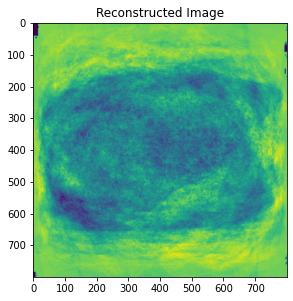

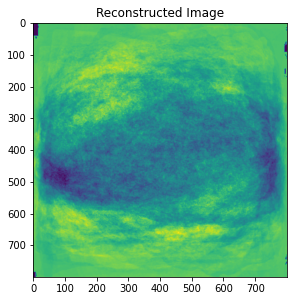

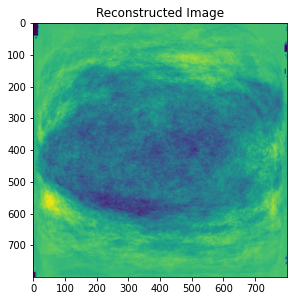

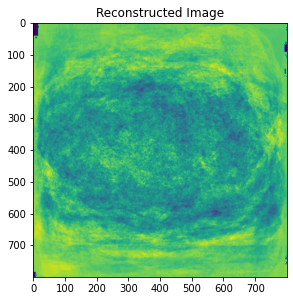

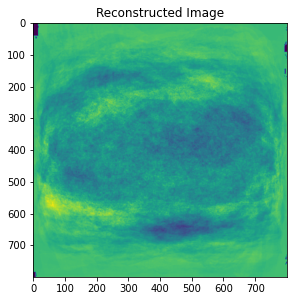

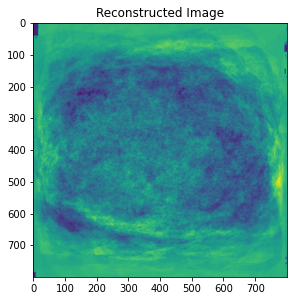

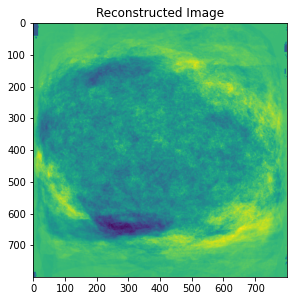

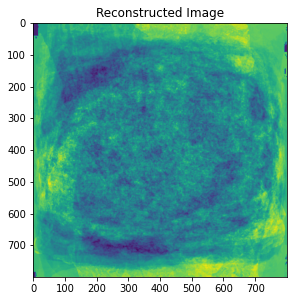

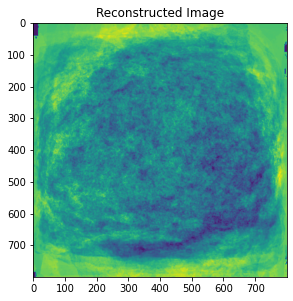

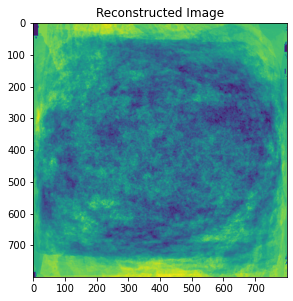

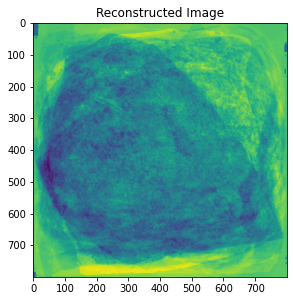

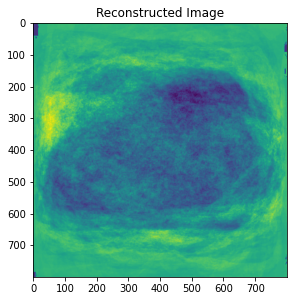

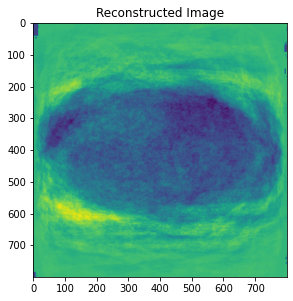

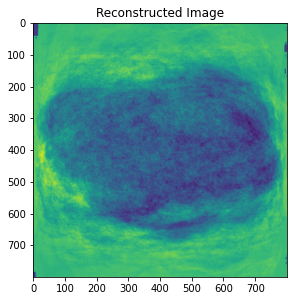

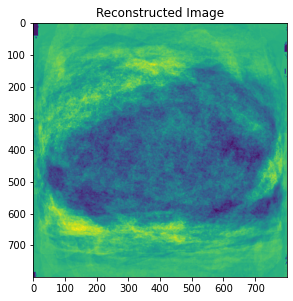

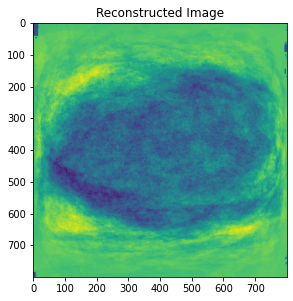

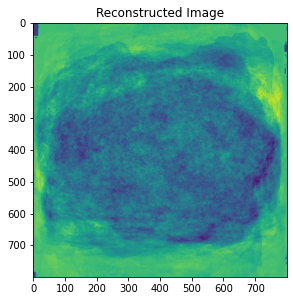

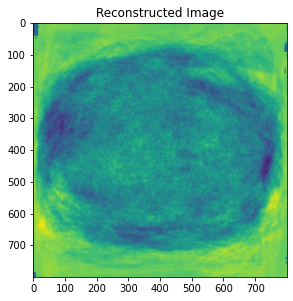

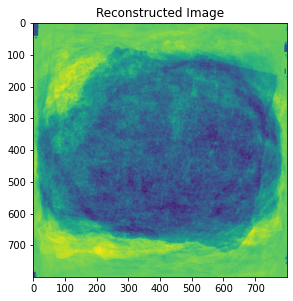

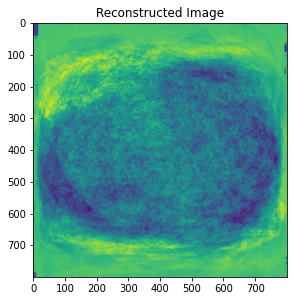

In [180]:


# Plot original and reconstructed images
for i in range(0,20):
    plt.figure(figsize=(10, 5))



    plt.subplot(1, 2, 2)
    plt.imshow(image_reconstructed[i].reshape(800,800))
    plt.title('Reconstructed Image')

    plt.show()


## 7) Build a feedforward neural network (using dense and/or CNN layers) with a few hidden layers (we suggest using Keras (within Tensorflow) or Pytorch). Train the network to classify on 360 rock images using rock name as the label - the category is indicated by the first letter in the filename (I, M and S). Use images from '120 Rocks' folder as your validation data

In [181]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from PIL import Image

In [183]:
from skimage import io, color

In [208]:
train_rocks="/Users/amitsai/Desktop/MASTERS SEM2/AML/Homework/Homework3/Question1/360 Rocks"
val_rocks="/Users/amitsai/Desktop/MASTERS SEM2/AML/Homework/Homework3/Question1/120 Rocks"

def get_img_lab(path):
    image_list=[]
    label_list=[]
    label_encode = {'I': 0, 'M': 1, 'S': 2}
    for image in os.listdir(path):
        single_image = io.imread(os.path.join(path,image))
        grayscale_image = color.rgb2gray(img_as_float(single_image))# img_as_float is used to convert each pixel values of single_image to floating-point numbers in the range [0, 1].
        resize_g_img = np.resize(grayscale_image, (128, 128)) #grayscale_image.reshape(128,128) 
        
        image_list.append(np.array(resize_g_img))
        label_list.append(label_encode[image[0]])
        
    return np.array(image_list),np.array(label_list)

train_images, train_labels= get_img_lab(train_rocks)
val_images, val_labels=get_img_lab(val_rocks)


#convert to one hot encoding
train_labels = to_categorical(train_labels,num_classes=3)
val_labels = to_categorical(val_labels, num_classes=3)



In [215]:
train_images.shape

(360, 128, 128)

In [221]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Conv2D(64,(5,5), activation = 'relu', input_shape=(128,128,1)),
    MaxPooling2D((3,3)),
    Conv2D(128,(5,5), activation = 'relu'),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(64,activation='relu'),
    Dropout(0.5),
    Dense(8, activation="relu"),
    Dropout(0.5),
    Dense(3,activation="softmax")
    
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

## A) Report the training time

In [222]:
import time

start_time = time.time()

history = model.fit(train_images, train_labels, epochs=30, validation_data=(val_images, val_labels))

end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

Epoch 1/30
12/12 [==============================] - 6s 424ms/step - loss: 1.1327 - accuracy: 0.3389 - val_loss: 1.0988 - val_accuracy: 0.3333
Epoch 2/30
12/12 [==============================] - 5s 395ms/step - loss: 1.1020 - accuracy: 0.3139 - val_loss: 1.0988 - val_accuracy: 0.3333
Epoch 3/30
12/12 [==============================] - 5s 446ms/step - loss: 1.0997 - accuracy: 0.3222 - val_loss: 1.0988 - val_accuracy: 0.3333
Epoch 4/30
12/12 [==============================] - 5s 427ms/step - loss: 1.1002 - accuracy: 0.3194 - val_loss: 1.0988 - val_accuracy: 0.3333
Epoch 5/30
12/12 [==============================] - 5s 427ms/step - loss: 1.0981 - accuracy: 0.3389 - val_loss: 1.0986 - val_accuracy: 0.3500
Epoch 6/30
12/12 [==============================] - 5s 420ms/step - loss: 1.0966 - accuracy: 0.3444 - val_loss: 1.0986 - val_accuracy: 0.3500
Epoch 7/30
12/12 [==============================] - 5s 432ms/step - loss: 1.0973 - accuracy: 0.3528 - val_loss: 1.0955 - val_accuracy: 0.3500
Epoch 

The total training time is 167.24623942375183 seconds

## B)  Plot training and validation loss and accuracy as a function of training epochs

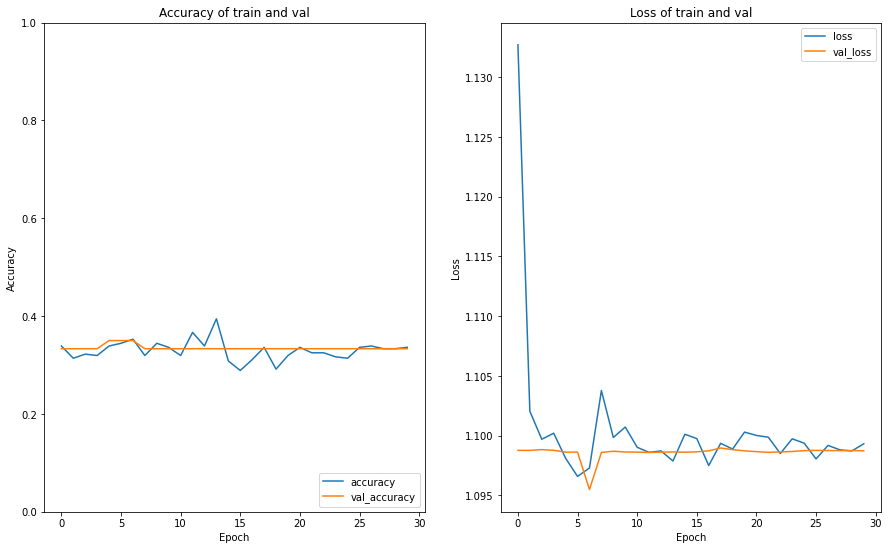

In [258]:
plt.figure(figsize=(15, 9))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy of train and val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title("Loss of train and val")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

## C) How many parameters does the network have? How many of those parameters are bias parameters?

In [227]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 124, 124, 64)      1664      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 41, 41, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 37, 37, 128)       204928    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 18432)             0         
                                                                 
 dense_5 (Dense)             (None, 32)               

Total number of parameters are- 799,107

In [229]:
bias_parameters = sum([layer.bias.shape[0] for layer in model.layers if hasattr(layer, 'bias') and layer.bias is not None])
print(f"Total number of bias parameters: {bias_parameters}")

Total number of bias parameters: 299


Total number of bias parameters are-299

## D) Compare the activity of neurons in the next to the last layer (the one with 8 neurons) with the human data. (to get human data use mds_360.txt and mds_120.txt files). Similar to before, use Procrustes analysis to do the comparison.  For training and validation data (separately), report disparity and compute the correlation coefficient between each dimension of mtx1 and mtx2. Display results in a table

In [231]:
from tensorflow.keras.models import Model

In [253]:
penultimate_model=Model(inputs = model.input, outputs = model.layers[-2].output)

penultimate_train_values= penultimate_model.predict(train_images)

penultimate_val_values=penultimate_model.predict(val_images)


In [249]:
import numpy as np

# Path to your text file
file_path = "/Users/amitsai/Desktop/MASTERS SEM2/AML/Homework/Homework3/Question1/mds_360.txt"

# Initialize an empty list to store the data
human_data_360_list = []

# Read the text file line by line
with open(file_path, "r") as file:
    for line in file:
        # Split each line into individual values (assuming space-separated values)
        values = line.strip().split()
        
        # Convert the values to float and append them to the data list
        human_data_360_list.append([float(value) for value in values])

# Convert the data list to a NumPy array
human_data_360_array = np.array(human_data_360_list)

# Check the shape of the array
print("Shape of the array:", human_data_360_array.shape)


Shape of the array: (360, 8)


In [250]:
import numpy as np

# Path to your text file
file_path = "/Users/amitsai/Desktop/MASTERS SEM2/AML/Homework/Homework3/Question1/mds_120.txt"

# Initialize an empty list to store the data
human_data_120_list = []

# Read the text file line by line
with open(file_path, "r") as file:
    for line in file:
        # Split each line into individual values (assuming space-separated values)
        values = line.strip().split()
        
        # Convert the values to float and append them to the data list
        human_data_120_list.append([float(value) for value in values])

# Convert the data list to a NumPy array
human_data_120_array = np.array(human_data_120_list)

# Check the shape of the array
print("Shape of the array:", human_data_120_array.shape)


Shape of the array: (120, 8)


In [257]:
from scipy.spatial import procrustes
from scipy.stats import pearsonr


mtx1_train, mtx2_train, disparity_train = procrustes(human_data_360_array, penultimate_train_values )

corr_coeffs_train = [pearsonr(mtx1_train[:, i], mtx2_train[:, i])[0] for i in range(mtx1_train.shape[1])]

mtx1_val, mtx2_val, disparity_val = procrustes(human_data_120_array, penultimate_val_values )

corr_coeffs_val = [pearsonr(mtx1_val[:, i], mtx2_val[:, i])[0] for i in range(mtx1_val.shape[1])]


results = {
    'Data': ['Training', 'Validation'],
    'Disparity': [disparity_train, disparity_val],
    'Correlation Coefficient Dimension 1': [corr_coeffs_train[0], corr_coeffs_val[0]],
    'Correlation Coefficient Dimension 2': [corr_coeffs_train[1], corr_coeffs_val[1]],
}

results_df = pd.DataFrame(results)
print(results_df)




         Data  Disparity  Correlation Coefficient Dimension 1  \
0    Training   0.995620                             0.010692   
1  Validation   0.996495                             0.045348   

   Correlation Coefficient Dimension 2  
0                             0.047786  
1                             0.078406  


Based on the table:

For both training and validation data, the activity of neurons in the next-to-last layer exhibits relatively high disparities compared to the human-assessed features.

The correlation coefficients between the activity of neurons and the human-assessed features vary across dimensions and datasets, indicating differing degrees of similarity between the two datasets.